In [1]:
pip install pandas matplotlib statsmodels seaborn


Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.holtwinters import ExponentialSmoothing


In [2]:
df = pd.read_csv("Retail_Store_Sales.csv") 
df['Date'] = pd.to_datetime(df['Date'])     
df.set_index('Date', inplace=True)          
df.head()


,Sales
Date,
2022-01-01,195
2022-01-02,211
2022-01-03,186
2022-01-04,207
2022-01-05,220


In [3]:
df.tail()

,Sales
Date,
2023-12-27,190
2023-12-28,189
2023-12-29,195
2023-12-30,205
2023-12-31,205


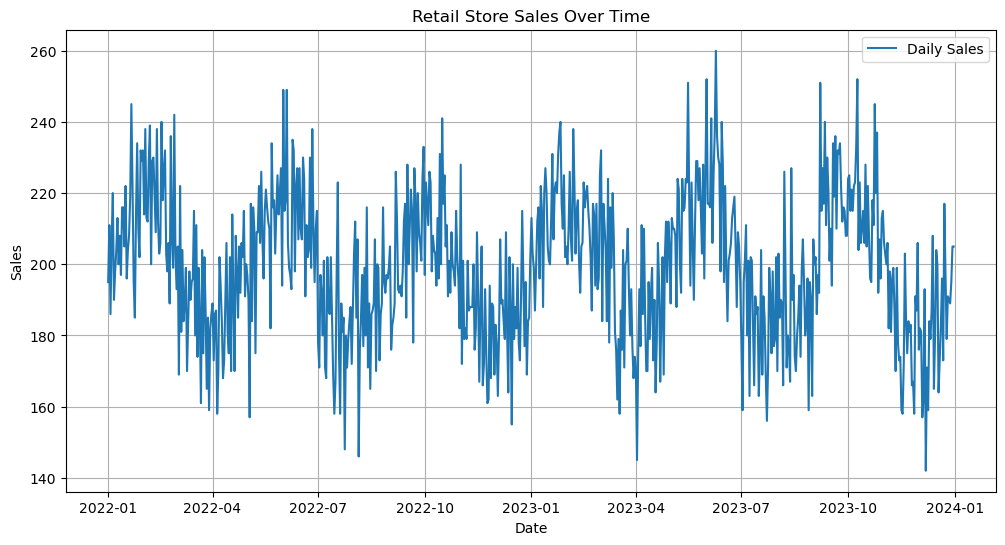

In [4]:
plt.figure(figsize=(12,6))
plt.plot(df['Sales'], label='Daily Sales')
plt.title("Retail Store Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.show()


In [16]:
monthly_sales = df['Sales'].resample('M').sum()
monthly_sales.head() 



C:\Users\Hi\AppData\Local\Temp\ipykernel_11164\3738422497.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df['Sales'].resample('M').sum()


Date
2022-01-31    6515
2022-02-28    6090
2022-03-31    5849
2022-04-30    5683
2022-05-31    6443
Freq: ME, Name: Sales, dtype: int64

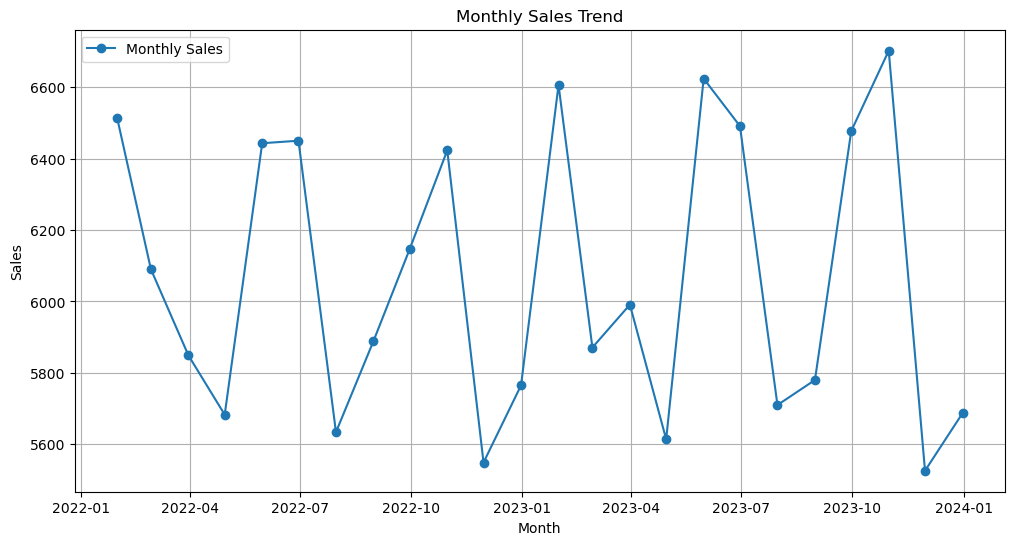

In [17]:
plt.figure(figsize=(12,6))
plt.plot(monthly_sales, marker='o', label='Monthly Sales')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.show()


#### Sir I reserving first 6 months data for testing and excepting data for training Process For my Convienent



In [18]:
train = monthly_sales[:-6]  
test = monthly_sales[-6:]   


In [20]:
print(len(train)) 

18


In [22]:
model = ExponentialSmoothing(train, trend='add', seasonal=None)
fit = model.fit()
forecast = fit.forecast(6)


### Actual Sales Vs My Prediction Sales

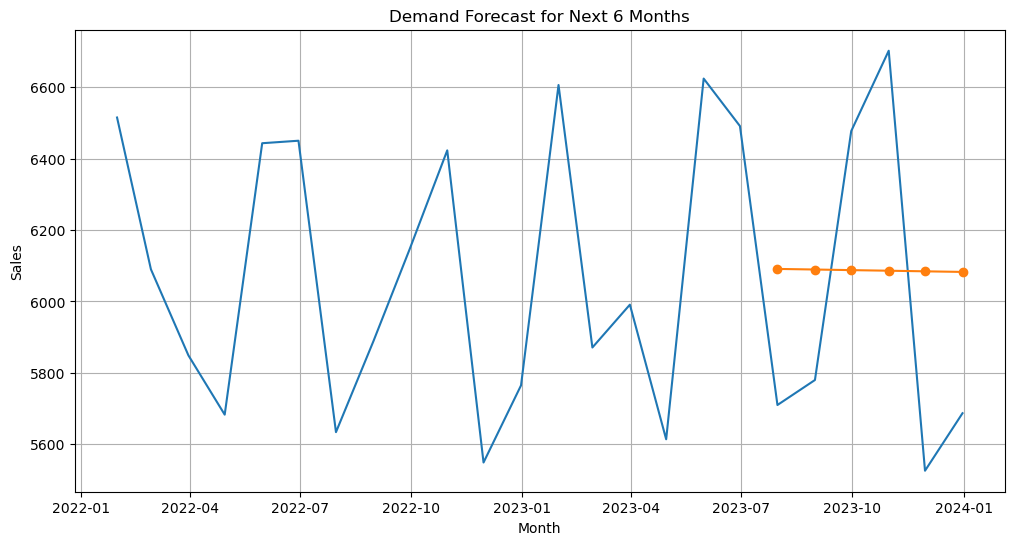

In [24]:
plt.figure(figsize=(12,6))
plt.plot(monthly_sales, label='Actual')        
plt.plot(forecast, label='Forecast', marker='o') 
plt.title("Demand Forecast for Next 6 Months")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.grid(True)
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

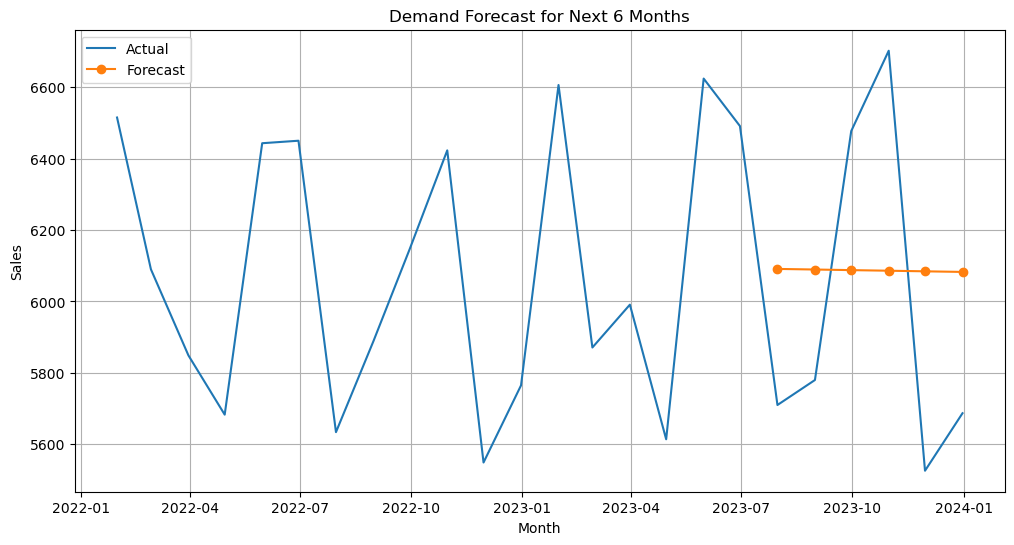

In [25]:
plt.figure(figsize=(12,6))
plt.plot(monthly_sales, label='Actual')        
plt.plot(forecast, label='Forecast', marker='o') 
plt.title("Demand Forecast for Next 6 Months")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.grid(True)
plt.legend()
plt.show